In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes=load_dataset()
X_train=X_train_orig/255
X_test=X_test_orig/255
Y_train=Y_train_orig.T
Y_test=Y_test_orig.T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [3]:
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input=Input(input_shape)
    # Zero-Padding: pads the border of X_input with zeroes
    X=ZeroPadding2D((3,3))(X_input)
    # CONV -> BN -> RELU Block applied to X
    X=Conv2D(32,(7,7),strides=(1,1),name="conv0")(X)
    X=BatchNormalization(axis=3,name="bn0")(X)
    X=Activation("relu")(X)
    #maxpool
    X=MaxPooling2D((2,2),name="max_pool")(X)
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X=Flatten()(X)
    X=Dense(1,activation="sigmoid",name="fc")(X)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model=Model(inputs=X_input,outputs=X,name="HappyModel")
    return model

In [4]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input=Input(input_shape)
    # Zero-Padding: pads the border of X_input with zeroes
    X=ZeroPadding2D((3,3))(X_input)
    # CONV -> BN -> RELU Block applied to X
    X=Conv2D(32,(7,7),strides=(1,1),name="conv0")(X)
    X=BatchNormalization(axis=3,name="bn0")(X)
    X=Activation("relu")(X)
    #maxpool
    X=MaxPooling2D((2,2),name="max_pool")(X)
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X=Flatten()(X)
    X=Dense(1,activation="sigmoid",name="fc")(X)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model=Model(inputs=X_input,outputs=X,name="HappyModel")
    return model

In [5]:
happyModel=HappyModel(X_train.shape[1:])

In [6]:
happyModel.compile("adam","binary_crossentropy",metrics=["accuracy"])

In [7]:
happyModel.fit(X_train,Y_train,batch_size=50,epochs=40)

Epoch 1/40
600/600 [==============================] - 22s 36ms/step - loss: 2.5891 - acc: 0.5283
Epoch 2/40
600/600 [==============================] - 22s 36ms/step - loss: 0.6802 - acc: 0.7417
Epoch 3/40
600/600 [==============================] - 21s 34ms/step - loss: 0.3378 - acc: 0.8650
Epoch 4/40
600/600 [==============================] - 21s 35ms/step - loss: 0.1771 - acc: 0.9283
Epoch 5/40
600/600 [==============================] - 22s 36ms/step - loss: 0.1463 - acc: 0.9433
Epoch 6/40
600/600 [==============================] - 20s 33ms/step - loss: 0.1364 - acc: 0.9400
Epoch 7/40
600/600 [==============================] - 20s 33ms/step - loss: 0.1225 - acc: 0.9717
Epoch 8/40
600/600 [==============================] - 23s 38ms/step - loss: 0.1103 - acc: 0.9533
Epoch 9/40
600/600 [==============================] - 22s 36ms/step - loss: 0.1067 - acc: 0.9683
Epoch 10/40
600/600 [==============================] - 22s 37ms/step - loss: 0.0678 - acc: 0.9817
Epoch 11/40
600/600 [========

In [8]:
preds=happyModel.evaluate(X_test,Y_test,batch_size=32,verbose=1,sample_weight=None) # Verbosity mode. 0 = silent, 1=progress bar.
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 2s 12ms/step
Loss = 0.09551956593990325
Test Accuracy = 0.9600000039736429


X shape=(64, 64, 3)
X shape=(64, 64, 3)
(64, 64, 3)


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (64, 64, 3)

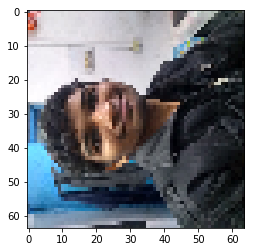

In [16]:
img_path = 'images/Test_5.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)
x = image.img_to_array(img)
print("X shape="+str(x.shape))
# x = np.expand_dims(x, axis=0)
print("X shape="+str(x.shape))
x = preprocess_input(x) #the images you load are compatible with preprocess_input.
print(x.shape)
Z=int(happyModel.predict(x))
if Z:
    print("Welcome because you are happy")
else:
    print("You are not allowed")